### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [39]:
#import the necessary libraries as seen below
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline 

#sets the variable for the number of trading days in a year for future use
year_trading_days = 252

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [40]:
#Imports the data from the csv and formats it in a pandas dataframe
whale_df = pd.read_csv(
    Path("../Module4_Challenge/Resources/whale_navs.csv"),
    index_col="date", 
    parse_dates=True,
    infer_datetime_format=True)

#shows the first 5 rows of the dataframe
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [41]:
#calculate percent change to get daily returns dataframe
#dropna gets rid of NaN in first row as a result of percent change 
whale_dr = whale_df.pct_change().dropna()

#shows the first 5 rows of the dataframe
whale_dr.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

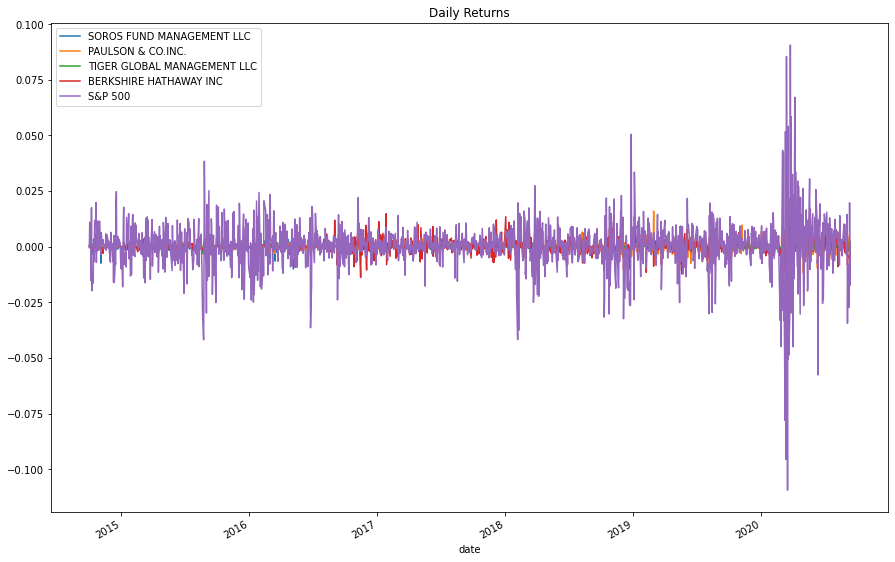

In [42]:
# plots the daily returns of each of the 4 funds and the S&P 500
whale_dr.plot(figsize=(15,10), title="Daily Returns")


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [43]:
#calculates cumulative returns, from the daily returns, of the 4 funds and S&P 500
whale_cumulative_returns = (1+ whale_dr).cumprod()

#shows the last 5 rows of the dataframe
whale_cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='date'>

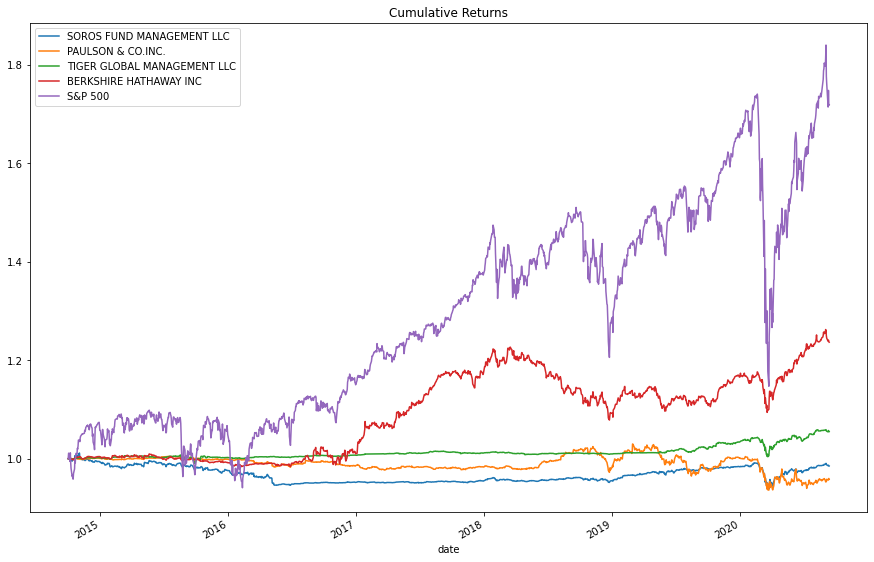

In [44]:
# plots the cumulative returns of the 4 funds and S&P 500
whale_cumulative_returns.plot(figsize=(15,10), title="Cumulative Returns")

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # None of the four fund portfolios consistently outperform the S&P 500. There are moments where the S&P 500 dips below the four funds, but never for very long. 

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns Box Plot'}>

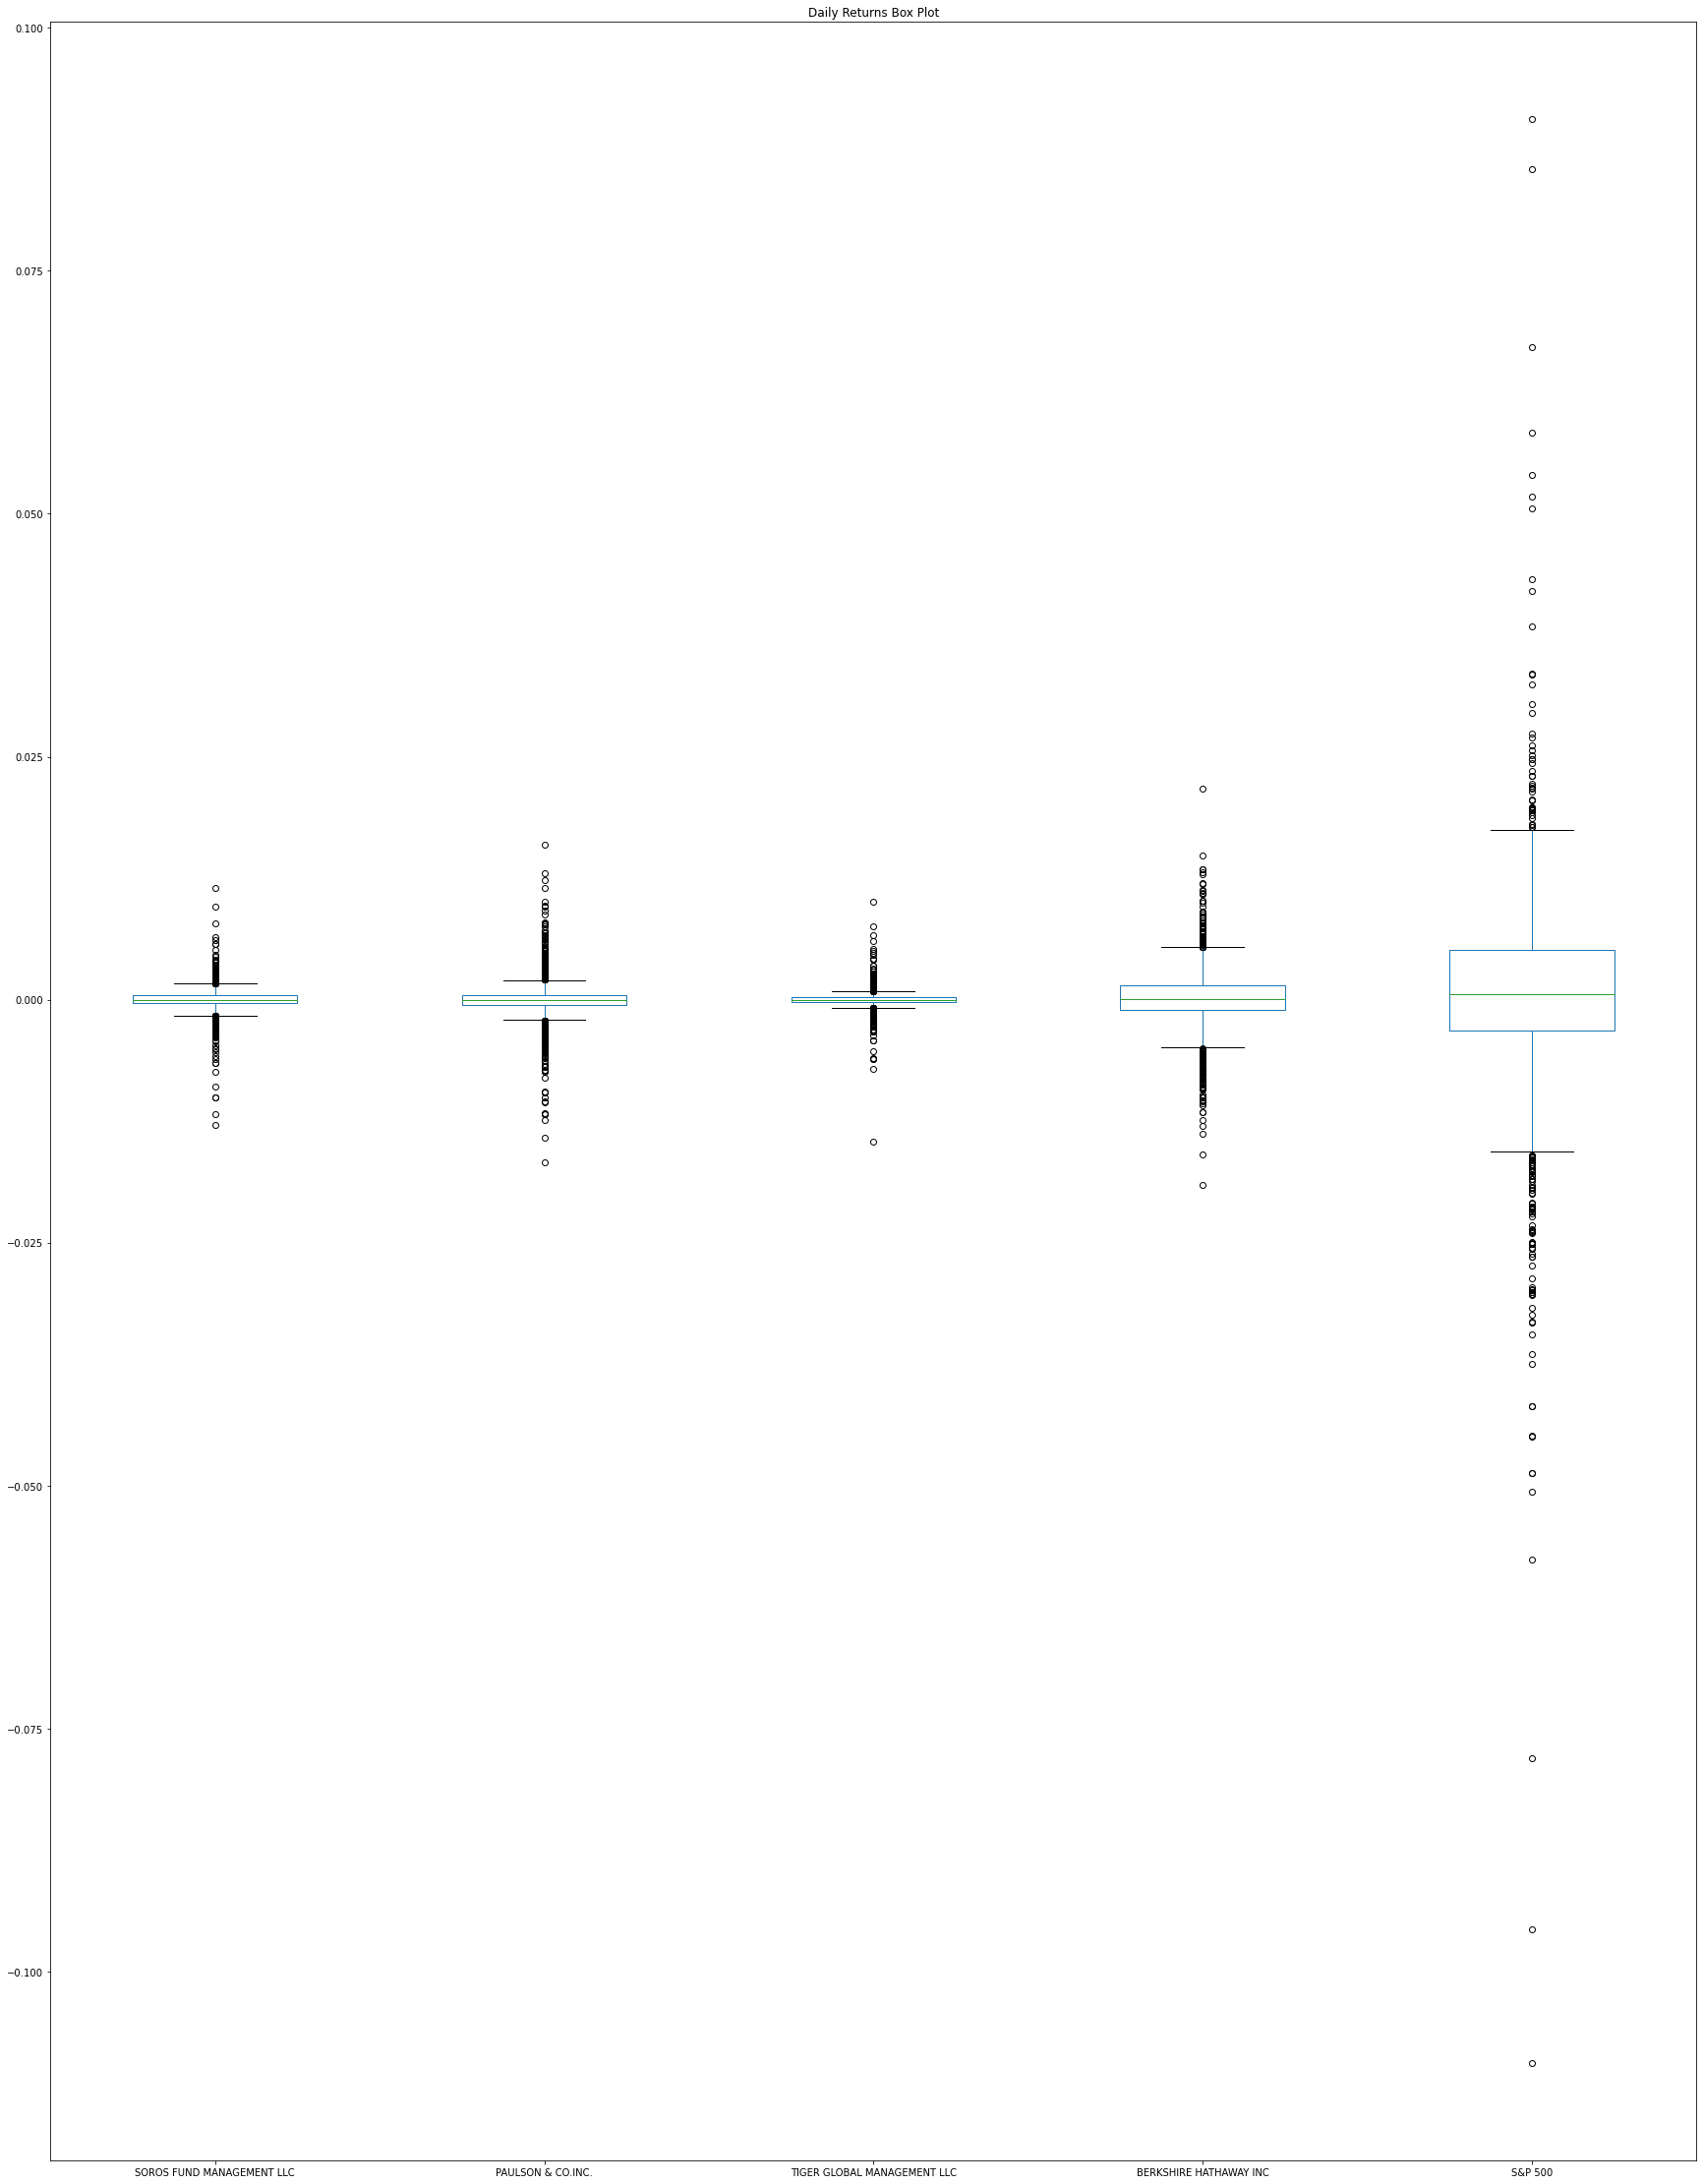

In [45]:
# plots daily returns as box plots (box and whisker plot) of 4 funds and S&P 500
whale_dr.plot(kind="box", figsize=(30,40), title="Daily Returns Box Plot")


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Four Funds Box Plots'}>

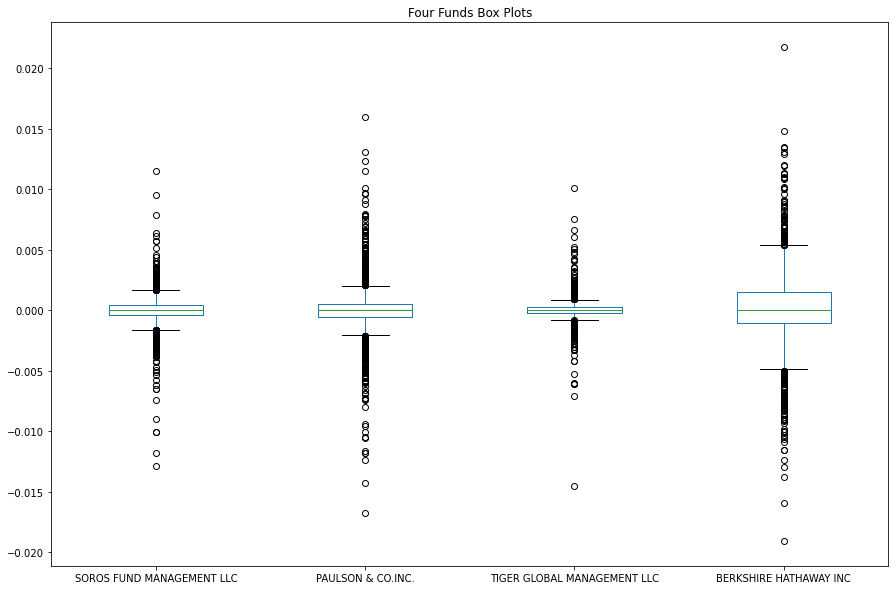

In [46]:
# plots the daily return data for only the 4 funds 
four_funds = whale_df.drop(columns=["S&P 500"], axis=1)
four_funds = four_funds.pct_change().dropna()
four_funds.plot(kind="box",figsize=(15,10), title="Four Funds Box Plots")

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # Based on the box plots, the Berkshire Hathaway fund portfolio is the most volatile. The Tiger Global Management portfolio is the least volatile.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [47]:
#calculates the standard deviations of the 4 funds and S&P 500
#sorts the standard deviations from smallest to largest
whale_df_std = whale_df.std().sort_values()
whale_df_std

PAULSON & CO.INC.               0.240011
SOROS FUND MANAGEMENT LLC       0.485997
TIGER GLOBAL MANAGEMENT LLC     0.751144
BERKSHIRE HATHAWAY INC          4.185067
S&P 500                        41.005779
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [48]:
#calulates the annualized standard deviation of the 4 funds and S&P 500 using 252 as the number of trading days
whale_std_ann = whale_df_std * np.sqrt(year_trading_days)

whale_std_ann

PAULSON & CO.INC.                3.810063
SOROS FUND MANAGEMENT LLC        7.714968
TIGER GLOBAL MANAGEMENT LLC     11.924046
BERKSHIRE HATHAWAY INC          66.435883
S&P 500                        650.946561
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Rolling Standard Deviations of 4 Funds and S&P 500'}, xlabel='date'>

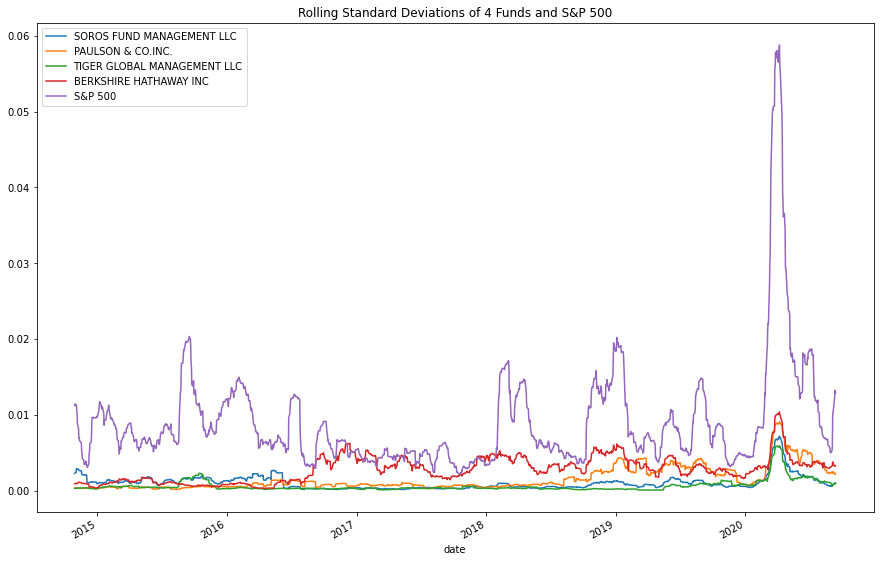

In [49]:
#calculates the rolling standard deviation in a window of 21 days
whale_roll = whale_dr.rolling(window=21).std()

#plots the rolling standard deviation over the 21 day window 
whale_roll.plot(figsize=(15,10), title="Rolling Standard Deviations of 4 Funds and S&P 500")

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Four Portfolios Rolling Standard Deviations 21 Days'}, xlabel='date'>

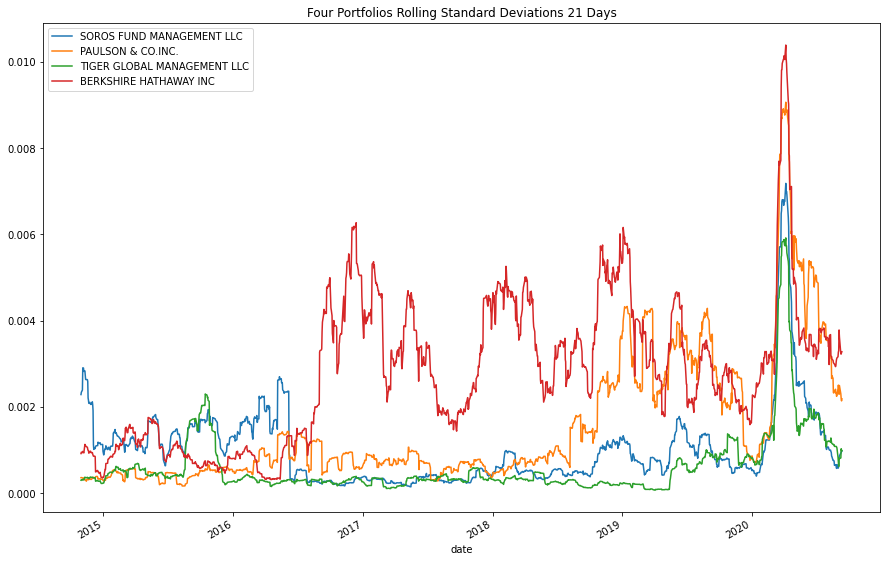

In [50]:
# calculates and plots the rolling standard deviation over 21 days for only the 4 funds 
four_stdevs= whale_dr.drop(columns=["S&P 500"], axis=1).rolling(window=21).std()
four_stdevs.plot(figsize=(15,10), title="Four Portfolios Rolling Standard Deviations 21 Days")


#### Step 5: Answer the following three questions:


**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # None of the portfolios poses more risk than the S&P 500. 

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** The risk of each portfolio increases at more or less the same time as the S&P 500, but not as much. There are some instances where all four portfolios increase in risk at the same time as the S&P 500. There are other times where only one or two of the portfolios increases in a noticable way when the S&P 500 increases. None of the increases in risk for the four portfolios comes close to the risk of the S&P 500. 


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # Generally speaking, the Berkshire Hathaway portfolio is the riskiest. There were times in the past when the Tiger and Soros portfolios were riskier, but in the most recents years, Berkshire Hathaway has shown itself to be riskiest. 

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [72]:
#calculates the annual average return for the funds and S&P 500
whale_returns_annual = whale_dr.mean() * year_trading_days

#reviews the annual average returns in order from least to greatest 
whale_returns_annual.sort_values()


PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [52]:
# calculates the Sharpe Ratios of the 4 funds and S&P 500 and sorts them from least to greatest 
#Sharpe Ratio used to calculate the risk-return profile 
whale_sharpe = whale_returns_annual/whale_std_ann

whale_sharpe.sort_values()

PAULSON & CO.INC.             -0.001741
SOROS FUND MANAGEMENT LLC     -0.000296
S&P 500                        0.000166
BERKSHIRE HATHAWAY INC         0.000558
TIGER GLOBAL MANAGEMENT LLC    0.000767
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratio for 4 Portfolios and S&P 500'}>

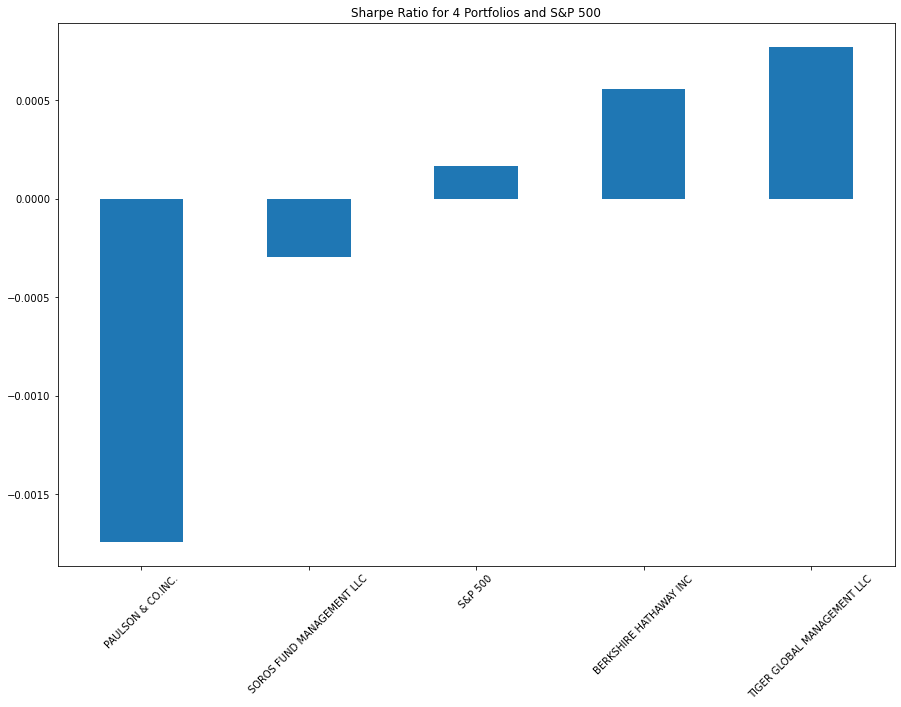

In [53]:
#plots sharpe ratios 
whale_sharpe.sort_values().plot(kind="bar", figsize=(15,10), title="Sharpe Ratio for 4 Portfolios and S&P 500", rot=45)

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # The Tiger Global Management portfolio offers the best risk-return profile. The Paulson & Co. portfolio offers the worst risk-return profile. 

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [54]:
# Calculates the variance of the S&P 500 using a rolling 60-day window.
snp_variance = whale_dr["S&P 500"].rolling(60).var()

#shows the last five rows of the S&P 500's rolling variance 
snp_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [59]:
# Calculates the covariance using a 60-day rolling window 

bh_snp_cov= whale_dr["BERKSHIRE HATHAWAY INC"].rolling(60).cov(whale_dr["S&P 500"])

# Reviews the last five rows of the covariance data
bh_snp_cov.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [63]:
# Calculates the beta based on the 60-day rolling covariance of the Berkshire Hathaway fund compared to the market (S&P 500)
bh_beta = bh_snp_cov/snp_variance

# Reviews the last five rows of the beta information
bh_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [64]:
# Calculate the average of the 60-day rolling 
bh_beta_mean = bh_beta.mean()

#prints results
bh_beta_mean


0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Berkshire Hathaway Rolling Beta 60 Days'}, xlabel='date'>

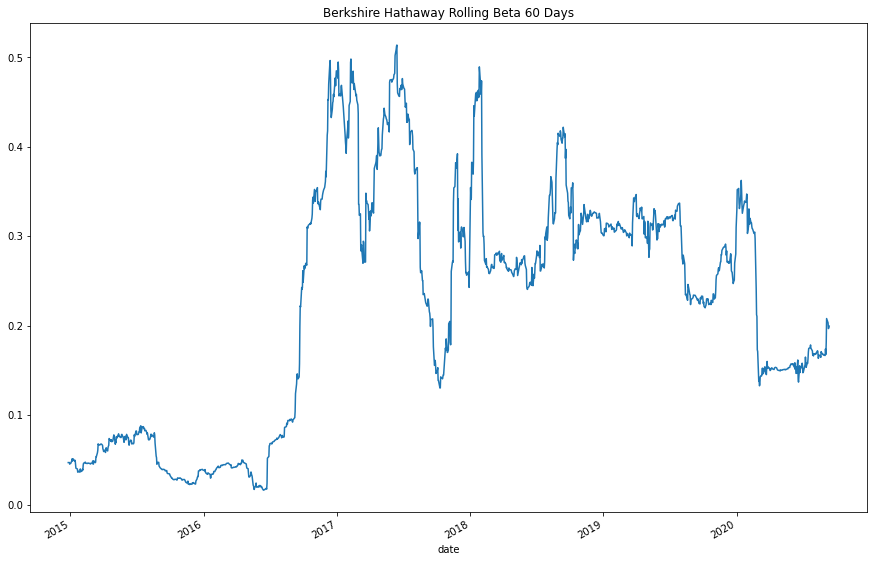

In [70]:
# plots the rolling beta for Berkshire Hathaway 
bh_beta.plot(figsize=(15,10), title="Berkshire Hathaway Rolling Beta 60 Days")


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [66]:
# Calculates the covariance of Tiger Global Management using a 60-day rolling window 
tgm_snp_cov= whale_dr["TIGER GLOBAL MANAGEMENT LLC"].rolling(60).cov(whale_dr["S&P 500"])

#shows the last five rows of the covariance data
tgm_snp_cov.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [67]:
# Calculate the beta based on the 60-day rolling covariance of the TGM fund compared to the market (S&P 500)
tgm_beta= tgm_snp_cov/snp_variance

# Reviews the last five rows of the beta information
tgm_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [68]:
# Calculates the average of the 60-day rolling beta for TGM
tgm_beta_mean = tgm_beta.mean()

#prints the average 
tgm_beta_mean

0.03093001487238774

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Tiger Global Management Rolling Beta 60 Days'}, xlabel='date'>

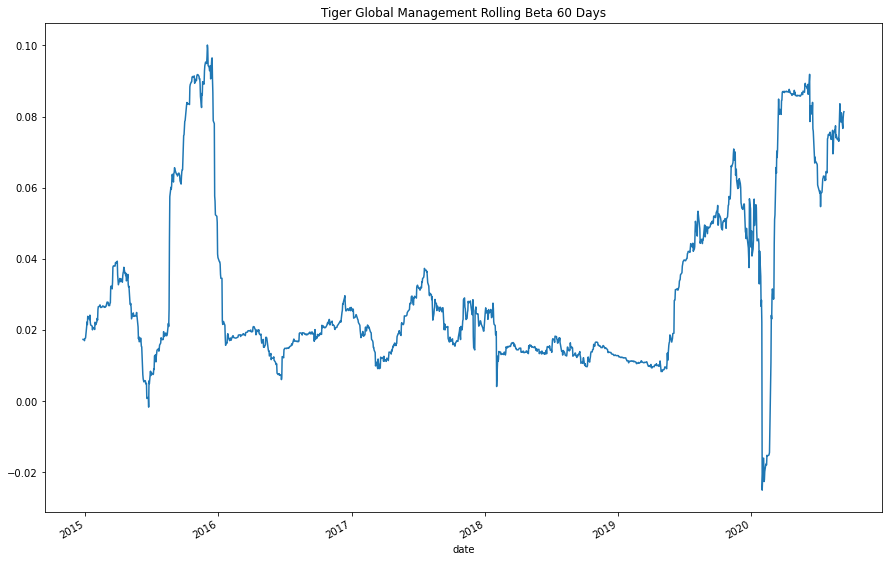

In [69]:
# Plots the rolling beta of the TGM fund 
tgm_beta.plot(figsize=(15,10), title="Tiger Global Management Rolling Beta 60 Days")

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # The Berkshire Hathaway portfolio is more sensitive to the movements of the market. Its average beta value is 0.2215 while the average beta for Tiger Global Management's portfolio is 0.0309. Because Berkshire Hathaway's average beta value is closer to 1 than Tiger Global Managements, the Berkshire Hathaway is more likely to change in value in line withe the S&P 500 and is therefore more sensitive. 


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # I would be more likely to recommend the Tiger Global Management fund. It has the highest risk-return profile value and is less volatile than the Berkshire Hathaway portfolio. Overall, the best investments are long-term, safer investments, and because TGM's portfolio has a smaller standard deviation than Berkshire Hathaway, the TGM fund is less risky, making it the better choice. 

---